Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

If a variable is given to you, give your answer to that variable. In case of multiple choice questions, answer to the given variable. Make sure your variable has a **string value** and it contains only the letter of your choice. For example if you think that choice b is the correct choice, and the given variable is answer, your answer should look like this:

answer = 'b'

or 

answer = 'B'

If you need to read a file for a task, datafiles, such as .csv or .txt files are found in data subfolder. This can be accessed using data/filename.extension. In case of image, they are found in subfolder images. 

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below:

In [1]:
NAME = "Kalpani Kammangoda Mudalige"

---

# Multimodal Data Fusion - Exercise 3 - Data Alignment


In this exercise, we will take a closer look at the alignment of (multimodal) data in spatial, temporal, and semantic domains as well as radiometric normalization of calibrating the scale of variables. You will be learning about __spatial alignment__ with __image registration__, __temporal alignment__ with __dynamic time warping__ of time-series data, __semantical aligment__ of different data sources with __clustering methods__ for __image segmentation__, and __data normalization__ having different scales.

## Learning goals 

After this exercise, you should  

- get familiar with different data alignment types and techniques in multimodal data fusion
- be able to estimate of mutual information for spatial alignment / image registration
- be able to apply dynamic time-warping for temporal aligment of time-series
- be able to use k-means multi-modal image segmentation. 
- be able to normalize data in different ways


## Relevant Lecture

Lecture 4

## Relevant Sections in course book

Chapters 5, 6, 7, and 8

## Additional Material 

* Visualization and plotting with [matplotlib](https://matplotlib.org)
* Image processing with [scikit-image](https://scikit-image.org)
* Dynamic time warping with [simpledtw](https://github.com/talcs/simpledtw)
* scikit-learn page on [k-means](https://scikit-learn.org/stable/modules/clustering.html#k-means)


# Tutorial

## Loading and processing images

<a id='ImageDemo'></a>
<div class=" alert alert-info">
    <b>Tutorial.</b> Image processing with scikit-image.  
    
The code below reads image from the file, rotates it, transforms to different color space, and finally plot the result images. Run the code and get yourself familiar with libraries and functions ([skimage.transform]( https://scikit-image.org/docs/stable/api/skimage.transform.html?highlight=transform#module-skimage.transform) and [skimage.color](https://scikit-image.org/docs/stable/api/skimage.color.html?highlight=color#module-skimage.color)).

</div>

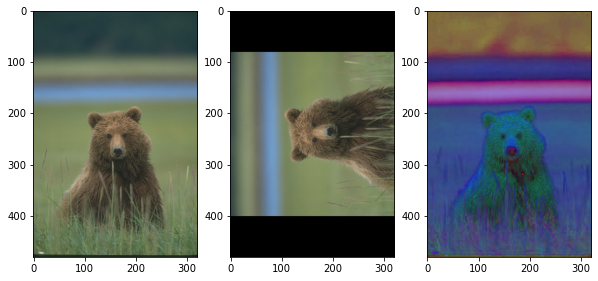

In [2]:
import numpy as np
import matplotlib.image as image
import matplotlib.pyplot as plt
from skimage.transform import rotate
from skimage.color import rgb2hsv

# loading image
img = image.imread('images/bear1.jpg')
# rotating image 90 degrees
img_rotated = rotate(img, 90)
# transform color space from RGB to HSV
img_hsv = rgb2hsv(img)

# display resulting images
f = plt.figure(figsize=(10,5))
f.add_subplot(1,3,1)
plt.imshow(img)
f.add_subplot(1,3,2)
plt.imshow(img_rotated)
f.add_subplot(1,3,3)
plt.imshow(img_hsv)

## Plotting historams

<a id='HistogramDemo'></a>
<div class=" alert alert-info">
    <b>Tutorial.</b> Calculating and visualizing histograms.  
    
The code below reads image from the file, transforms it to gray scale, calculates histograms. Run the code and get yourself familiar with 1D and 2D histograms ([matplotlib.pyplot.hist](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html) and [numpy.histogram2d](https://numpy.org/doc/stable/reference/generated/numpy.histogram2d.html)). Study what does these 1D and 2D histograms means in image context. 

</div>

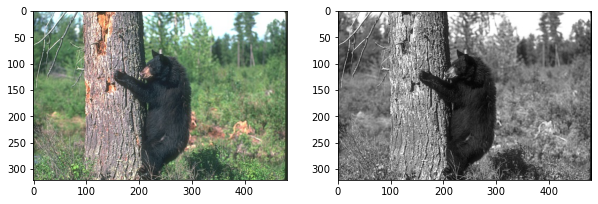

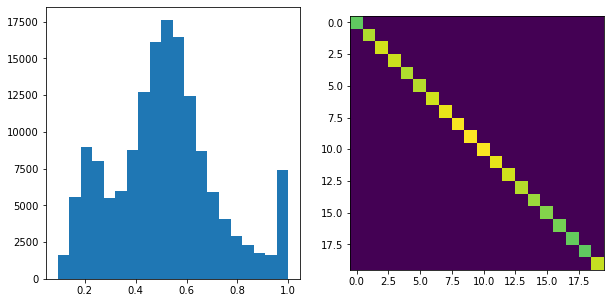

In [3]:
from skimage.color import rgb2gray
# loading image
img = image.imread('images/bear2.jpg')
# transform to gray scale
img_gray = rgb2gray(img)

# display images
f1 = plt.figure(figsize=(10,10))
f1.add_subplot(1,2,1)
h1 = plt.imshow(img)
f1.add_subplot(1,2,2)
h1 = plt.imshow(img_gray, cmap=plt.get_cmap('gray'))
plt.show()

# calculate and plot images and 1D/2D histogram using 20 bins
nbins = 20
f2 = plt.figure(figsize=(10,5))
f2.add_subplot(1,2,1)
hist1d = plt.hist(img_gray.flatten(), bins=nbins)
f2.add_subplot(1,2,2)
hist2d = np.histogram2d(img_gray.flatten(), img_gray.flatten(), bins=nbins)[0]
nz = hist2d > 0
hist2d[nz] = np.log(hist2d[nz])
plt.imshow(hist2d, interpolation='nearest')

## Dynamic time warping

<a id='DTWDemo'></a>
<div class=" alert alert-info">
    <b>Tutorial.</b> Dynamic time warping between time-series.  
    
The code below generates two univariate time-series and then match them using Dynamic time warping (DTW) method. Run the code and get yourself familiar with DTW [simpledtw](https://github.com/talcs/simpledtw). Study how DTW works and what are the inputs and outputs in dtw()-function. Outputs are also visualized in next code snippet.
</div>

### DTW: toy example

In [4]:
import simpledtw

ts1 = np.array([4, 3.5, 3.7, 4, 4.4, 5, 6, 6.5]) # 1st time-series
ti1 = np.array(range(0, len(ts1))) # time indices
ts2 = np.array([2, 2.7, 2.5, 4.5, 5, 5.7]) # 2nd time-series
ti2 = np.array(range(2, len(ts1))) # time indices
matches, cost, mapping1, mapping2, matrix = simpledtw.dtw(np.array([ti1, ts1]).T, np.array([ti2,ts2]).T) # calcute DTW distance between time-series
print('Distance (warping cost):', cost)
print('Dynamic programming matrix:\n', matrix)
print('Mapping 1', mapping1)
print('Mapping 2', mapping2)

Distance (warping cost): 11.153179524695364
Dynamic programming matrix:
 [[ 2.82842712  6.09798367 10.36998554 15.39492335 21.47768588 28.68115727]
 [ 4.63120276  4.98249305  8.14477071 12.26787633 17.48802959 23.87864771]
 [ 6.33120276  6.04541632  7.31487381 10.41970874 14.62565691 20.01082172]
 [ 8.56727074  7.34541632  7.84819196  9.37642662 12.53870428 16.88496704]
 [11.69137061  9.31772462  9.24541632  8.85317952 10.94124083 14.21079737]
 [15.9340113  12.36567475 11.93799873  9.35317952  9.85317952 11.97214153]
 [21.59086555 16.82549537 15.9691276  11.15595516 10.35317952 10.89721018]
 [28.31767757 22.34274106 20.9691276  13.98438229 12.15595516 11.15317952]]
Mapping 1 [[0], [0], [1], [2], [3], [3], [4], [5]]
Mapping 2 [[0, 1], [2], [3], [4, 5], [6], [7]]


### DTW: plotting the results

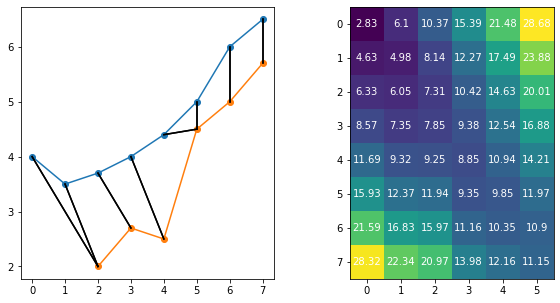

In [5]:
f = plt.figure(figsize=(10,5))
f.add_subplot(1,2,1)

# plot data
plt.plot(ti1, ts1, '-o')
plt.plot(ti2, ts2, '-o')

# plot connections between points
for i, indices in enumerate(mapping1):
    for j in indices:
        plt.plot([ti1[i],ti2[j]],[ts1[i],ts2[j]], 'k')

for i, indices in enumerate(mapping2):
    for j in indices:
        plt.plot([ti1[j],ti2[i]],[ts1[j],ts2[i]], 'k')  

# plot dp matrix
ax = f.add_subplot(1,2,2)
ax.imshow(matrix) 
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        text = ax.text(j, i, np.round(matrix[i, j], 2),
                       ha="center", va="center", color="w")

plt.show()

## K-means clustering

<a id='KmeansDemo'></a>
<div class=" alert alert-info">
    <b>Tutorial.</b> Clustering with k-means algorithm.  

The code below defines k-means clustering algorithm and applied it to syntetic 2D data. Run the code and study how k-means works ([sklearn.cluster.Kmeans](https://scikit-learn.org/stable/modules/clustering.html#k-means)), what are the inputs and outputs of kmeans_clustering()-function, how can you interpret the result of toy example.

</div>

In [6]:
from sklearn.cluster import KMeans

def kmeans_clustering(X, k=3, maximum_iterations=200):
    n, d = X.shape    # number of examples n and number of features d
    cluster_centers = np.zeros((k,d))    # Store the resulting clustering centers in the rows of this k x d matrix
    cluster_labels = np.zeros(n)    # Store here the resulting n cluster indices / labels (assigned for each example)

    k_means = KMeans(n_clusters = k, max_iter = maximum_iterations).fit(X)  # Fit k-means with k clusters and using max_iter maximum iterations
    cluster_centers = k_means.cluster_centers_  # cluster centers
    cluster_indices = k_means.labels_  # cluster label indices for each example
    return cluster_centers, cluster_indices

### K-means: toy example

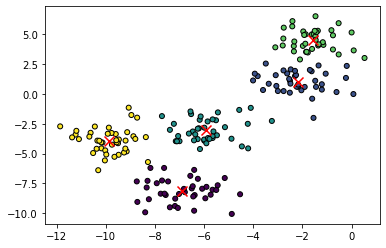

In [7]:
from sklearn.datasets import make_blobs

# generate 2D clusters with 5 centers
X, y = make_blobs(n_samples=200, centers=5, n_features=2, random_state=1)

# fit k-means fit 5 clusters
cluster_means, cluster_indices = kmeans_clustering(X, k = 5)

# visualize data and clustering results
plt.scatter(X[:, 0], X[:, 1], marker='o', c=cluster_indices,
            s=25, edgecolor='k')
plt.scatter(cluster_means[:,0], cluster_means[:,1], marker='x', s=100, color = 'r')

# -----------------------------------------------------------------------

# Assignments

## 1. Spatial Alignment: mutual Information for image registration

###  Introduction

In this assigment, we will take a look at mutual information between two images. For background, look at first part of the Lecture 4 (spatial alignment). Also, Chapter 5 in course book is relevant.

### The image data

The image data here are from two different magnetic resonance imaging sources ('T1-weighted-MRI.jpg', and 'T2-weighted-MRI.jpg'). Task is to transform the images and calculate mutual information based on the joint histogram.


<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 1.1. 

<p> 1) Complete the code below to rotate second MRI image 't2_img' by 45 degrees. </p>
<p> 2) Visualize original images and the resulting rotated image.</p>

Hint: Your output image should look like in the cell below
    
</div>

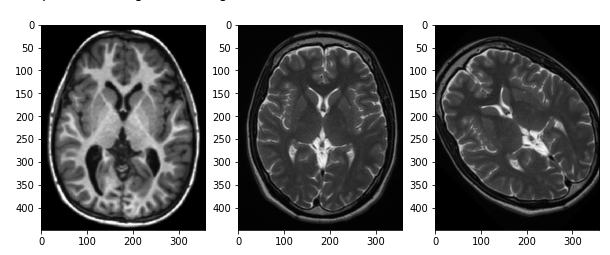

In [8]:
# Example image required for problem 1.1
from IPython.display import Image
Image(filename='images/task1.1.png')

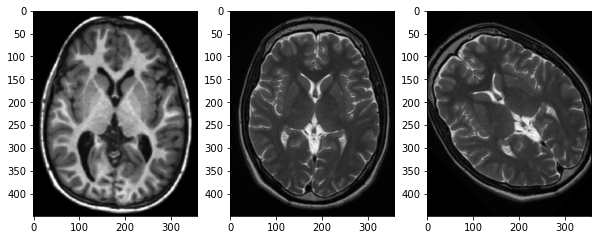

In [9]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from skimage.transform import rotate

# Answer to problem 1.1 in this cell

# load MRI images ('T1-weighted-MRI.jpg' and T2-weighted-MRI.jpg) as pixel array
# YOUR CODE HERE
#raise NotImplementedError()
t1_img = image.imread('images/T1-weighted-MRI.jpg')
t2_img = image.imread('images/T2-weighted-MRI.jpg')

# rotate image 't2_img' by 45 degrees
t2_img_45 = rotate(t2_img, 45)

# display all 3 array of pixels as an image
f = plt.figure(figsize=(10,5))
f.add_subplot(1,3,1)
plt.imshow(t1_img, cmap=plt.get_cmap('gray'))
f.add_subplot(1,3,2)
plt.imshow(t2_img, cmap=plt.get_cmap('gray'))
f.add_subplot(1,3,3)
plt.imshow(t2_img_45, cmap=plt.get_cmap('gray'))

In [10]:
# Your points for Problem 1.1 will be given in this cell. Do not modify it.

### 1D Histograms

<a id='Task1.2'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 1.2. 

<p> 1) Calculate and plot 1D histograms of three images above using 20 histogram bins. </p>
<p> 2) Compare the results. What can you say about histograms? Why first two are different and last two almost similar? </p>

Hint: Your output image should look like in the cell below

    
</div>

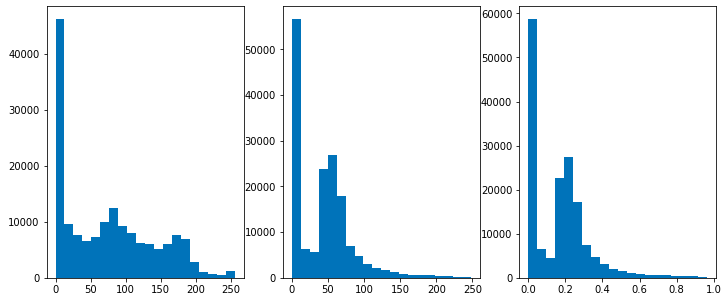

In [11]:
# Example image required for problem 1.2
from IPython.display import Image
Image(filename='images/task1.2.png')

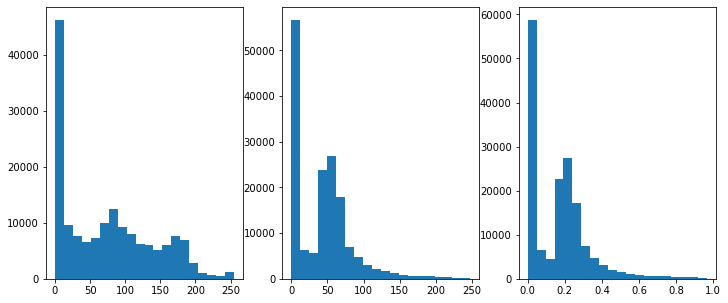

In [12]:
# Answer to Problem 1.2.1 in this cell 
# YOUR CODE HERE
#raise NotImplementedError()
f = plt.figure(figsize=(12,5))
f.add_subplot(1,3,1)
h1 = plt.hist(t1_img.flatten(), bins=20) # 1D histogram of t1_img
f.add_subplot(1,3,2)
h2 = plt.hist(t2_img.flatten(), bins=20) # 1D histogram of t2_img
f.add_subplot(1,3,3)
h3 = plt.hist(t2_img_45.flatten(), bins=20) # 1D histogram of t2_img_45

In [13]:
# Your points for Problem 1.2.1 will be given in this cell. Do not modify it.

#### 1.2.2: What can you say about histograms? Why first two are different and last two similar?
Answer to 1.2.2 in the cell below

First two are different and the second pair is similar, This is because first two images are different. and the last two are the same image. (may be rotation is discarded)

### 2D Histograms

<a id='Task1.3'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 1.3. 

<p>1) Calculate and plot 2D histograms of images below using 20 histogram bins (interpolation='nearest'). <i>Hint: Your output image should look like in the cell below</i>
</p>

<p>2) Compare the results. What can you say about 2D histograms? Why first one is diagonal and last two different compared to 1.2?</p>
</div>

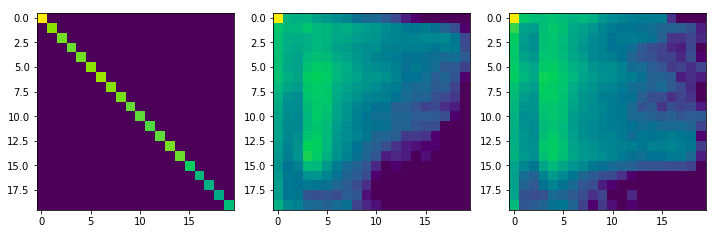

In [14]:
# Example image required for problem 1.3
from IPython.display import Image
Image(filename='images/task1.3.png')

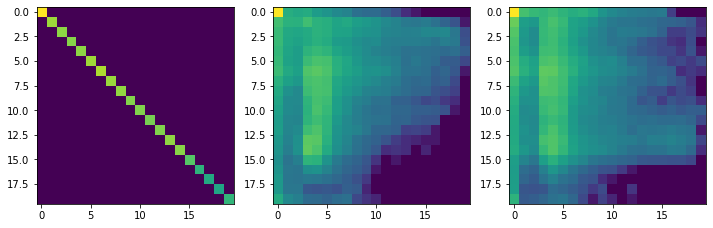

In [15]:
# Answer to Problem 1.3.1. in this cell

nbins = 20

# Plot three histogram between
    # 't1_img' and 't1_img'
    # 't1_img' and 't2_img'
    # 't1_img' and 't2_img_45'
    
    # Do realize, that if you use a different library to create the histograms, the image may look different.
    # Check that your image has the same type of data as the one in output hints. 
    # Your answer may be correct even if the images do not look the same. 
    # The output hints have been made using numpy. 

# YOUR CODE HERE
#raise NotImplementedError()

H1 = np.histogram2d(t1_img.flatten(), t1_img.flatten(), bins=nbins)[0] # 2D histogram t1_img, t1_img
#print(H1)
H2 = np.histogram2d(t1_img.flatten(), t2_img.flatten(), bins=nbins)[0] # 2D histogram t1_img, t2_img
H3 = np.histogram2d(t1_img.flatten(), t2_img_45.flatten(), bins=nbins)[0] # 2D histogram t1_img, t2_img_45

nz_1 = H1 > 0
#print(nz_1)
H1_copy = H1.copy()
hist1 = np.log(H1_copy[nz_1]) # Create a copy of H1 and then take logarithm of non-zero elements
H1_copy[nz_1] = hist1

nz_2 = H2 > 0
H2_copy = H2.copy()
hist2 = np.log(H2_copy[nz_2]) # Create a copy of H2 and then take logarithm of non-zero elements
H2_copy[nz_2] = hist2

nz_3 = H3 > 0
H3_copy = H3.copy()
hist3 = np.log(H3_copy[nz_3]) # Create a copy of H3 and then take logarithm of non-zero elements
H3_copy[nz_3] = hist3


f = plt.figure(figsize=(12,5))
f.add_subplot(1,3,1)
plt.imshow(H1_copy, interpolation='nearest')
f.add_subplot(1,3,2)
plt.imshow(H2_copy, interpolation='nearest')
f.add_subplot(1,3,3)
plt.imshow(H3_copy, interpolation='nearest')
# np.histogram2d(img_gray.flatten(), img_gray.flatten(), bins=nbins)[0]
# nz = hist2d > 0
# hist2d[nz] = np.log(hist2d[nz])
# plt.imshow(hist2d, interpolation='nearest')
# # Hint! See tutorial for help

In [16]:
# Your points for Problem 1.3.1 will be given in this cell. Do not modify it.

#### 1.3.2: Compare the results. What can you say about 2D histograms? Why first one is diagonal and last two different compared to 1.2?
Answer to 1.3.2 in the cell below

First on is diagonal because it takes the same image when creating 2D histogram and others are different because they compare the 1st image with 2nd and rotated 2nd image. The second 2 are bit almost similar because they the same image and one is rotated

### Mutual information of histograms

<a id='Task1.4'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 1.4. 

<p>Complete the code below to calculate and return mutual information of joint 2D histogram.
    Mutual information is defined as:
    \begin{equation*}
        MI(X;Y) = \sum_{y \in Y} \sum_{x \in X} p(x,y) log\bigg(\frac{p(x,y)}{p(x)p(y)}\bigg)
    \end{equation*}
    Also relevant material can be found from Lecture 4 (pages 5-9)
    </p> 
    
</div>

In [17]:
def mutual_information(hgram):
    """ Mutual information for joint histogram
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    # Convert bins counts to probability values
    pxy = hgram/np.sum(hgram)
    # calculate marginal for x over y
    px = np.sum(pxy, axis=1)
    # calculate marginal for y over x
    py = np.sum(pxy, axis=0)
    # Broadcast to multiply marginals
    px_py = px[:, None] * py[None, :]
    ## Now we can do the calculation using the probability values (pxy) and mutiplied marginals (px_py) 2D arrays
    # hint: Only non-zero pxy values contribute to the sum
    nz = pxy>0
    #print(nz)
    mi = np.sum(pxy[nz] * np.log(pxy[nz] / px_py[nz]))
    return mi


In [18]:
# Your points for Problem 1.4 will be given in this cell. Do not modify it.

### Rotated images and mutual information

<a id='Task1.5'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 1.5. 

<p>Complete the code below to calculate mutual information for rotated images using your solution. </p>
<p> 1) Generate 19 more rotated images of 't2_img' in the range of -45 to +45 degrees with increament of 5 degrees. </p>
<p> 2) Compute histograms between first mri image ('t1_img') and rotated images. Use bins = nbins</p> 
<p> 3) Calculate mutual information for each of these histograms (using function implemented above). </p>
<p> 4) Plot the mutual infomation values as function of rotation angles. <i>Hint: Your output image should look like in the cell below</i> </p>
<p> 5) In which angle mutual information is maximized? Think by yourself why is that. </p>
    
</div>

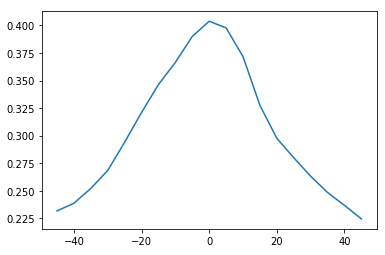

In [19]:
# Example image required for problem 1.5.4
from IPython.display import Image
Image(filename='images/task1.5.png')

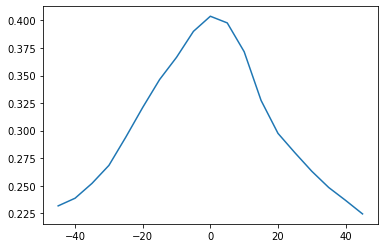

In [20]:
# Problem 1.5.1.
# generate 19 more rotated images of 't2_img' in the range of -45 to +45 degrees with increament of 5 degrees
rotated_images = [] # == save rotated images
labels = [] # == save angles of rotation for corresponding image
# YOUR CODE HERE
#raise NotImplementedError()
#rotation = -45
for i in range(-45, 50, 5):
    rotated_img = rotate(t2_img, i)
    labels.append(i)
    #img_gray= rgb2gray(rotated_img)[:,:,:3]
    rotated_images.append(rotated_img)
    #rotation += 5

#print(len(rotated_images))

# Problem 1.5.2.
# compute histograms between t1_img and all rotated t2_img ('rotated_images')
histograms = [] # == save histograms
## Your code here
for img in rotated_images:
    #t1_img_gray = rgb2gray(t1_img)[:,:,:3]
    histogram = np.histogram2d(t1_img.flatten(), img.flatten(), bins=20)[0]
#     nz = histogram>0
#     histogram[nz] = np.log(histogram[nz])
    histograms.append(histogram)

# Problem 1.5.3.
# calculate mutual information of each histogram
mi = []
## Your code here
for hist in histograms :
    mi.append(mutual_information(hist))

# Problem 1.5.4.
# plot mutual information of rotated images
## Your code here
plt.plot(labels, mi)

In [21]:
# Your points for Problems 1.5.1 and 1.5.2 will be given in this cell. Do not modify it.

In [22]:
# Your points for Problems 1.5.3 and 1.5.4 will be given in this cell. Do not modify it.

In [23]:
# Problem 1.5.5.
# Give answer as a integer corresponding to the angle. 
max_idx = mi.index(max(mi))
answer = labels[max_idx]
#print(answer)

In [24]:
# Your points for Problem 1.5.5 will be given in this cell. Do not modify it.

## 2. Temporal Alignment: Dynamic Time Warping

### Introduction

In this assigment, [simpledtw](https://github.com/talcs/simpledtw) library is used to calculate the dynamic time warping. This lirary can be directly imported from the exercise folder. Get familiar with the library (if not done yet) and complete the tasks below. For the background, take a look at second part of Lecture 4 (temporal aligment). Also Chapter 6. in course book is relevant.

### Hand gesture times series data

In this assignment, example of hand gestures recorded with wearable IMU devices are used to study DTW. This dataset includes multi-dimensional measurements but mean of 3-exis acceleration sensor is used as a time-series.

<a id='Task2.1'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 2.1. 

<p> Complete the code below to calculate DTW-based similarity between reference (reference_gesture) and unknown (gesture1, gesture2, gesture3) gestures.</p>
    <p> 1) Plot all four gestures. <i>Hint: Your output image should look like in the cell below</i> </p>
<p> 2) Calculate DTW similarity between reference and unknown gestures (use code from tutorial above).</p>
<p> 3) Print warping cost between reference and unknown gestures. </p>
<p> 4) Which one of the unkown gestures belong to same class as the reference gesture? Why? </p>
</div>

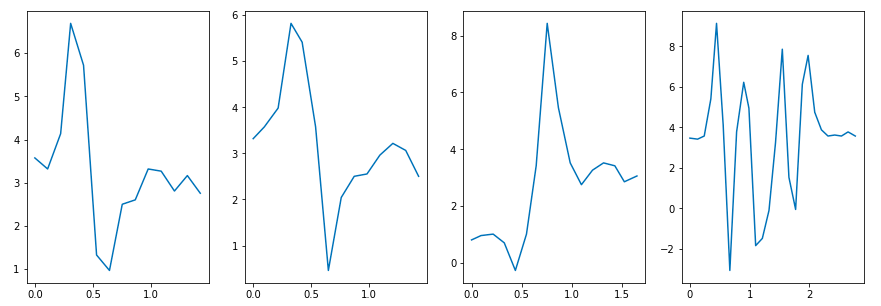

In [25]:
# Example image required for problem 2.1.1
from IPython.display import Image
Image(filename='images/task2.1.png')

6.428572992508663
25.78906643723184
51.367616886673986


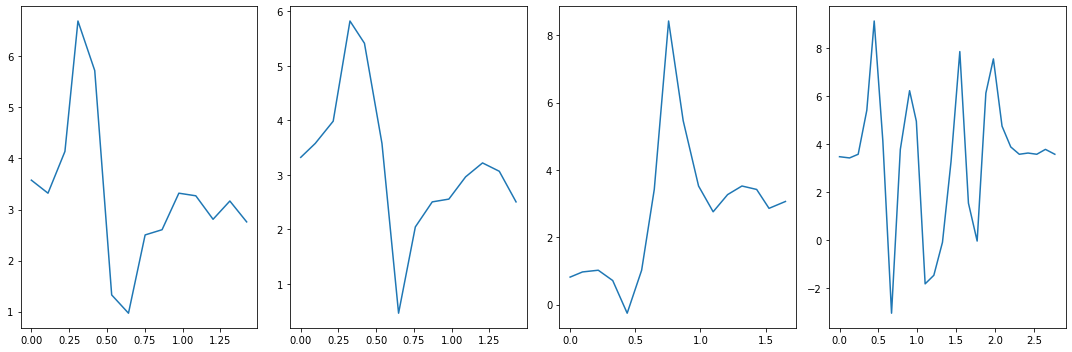

In [26]:
import simpledtw
import numpy as np

# load data
g1_1 = np.genfromtxt('data/gesture1.txt', delimiter=' ')
g1_2 = np.genfromtxt('data/gesture2.txt', delimiter=' ')
g2_1 = np.genfromtxt('data/gesture3.txt', delimiter=' ')
g2_2 = np.genfromtxt('data/gesture4.txt', delimiter=' ')

# pickup time-stamps and mean feature
reference_gesture = np.array([(g1_1[:,0]-g1_1[0,0])/1000.0, np.mean(g1_1[:, 3:6], axis=1)])
gesture1 = np.array([(g1_2[:,0]-g1_2[0,0])/1000.0, np.mean(g1_2[:, 3:6], axis=1)])
gesture2 = np.array([(g2_1[:,0]-g2_1[0,0])/1000.0, np.mean(g2_1[:, 3:6], axis=1)])
gesture3 = np.array([(g2_2[:,0]-g2_2[0,0])/1000.0, np.mean(g2_2[:, 3:6], axis=1)])

# Problem 2.1.1.
# Plot all four gestures
# YOUR CODE HERE
#raise NotImplementedError()
fig, axs = plt.subplots(1,4, figsize=(15,5))
axs[0].plot(reference_gesture[0], reference_gesture[1])
axs[1].plot(gesture1[0], gesture1[1])
axs[2].plot(gesture2[0], gesture2[1])
axs[3].plot(gesture3[0], gesture3[1])
fig.tight_layout()

# Problem 2.1.2.
# calculate DTW similarity between reference and unknown gestures
## Your code here
matches1, cost1, mapping_1_1, mapping_1_2, matrix1 = simpledtw.dtw(reference_gesture.T, gesture1.T) #Reference and gesture 1
matches2, cost2, mapping_2_1, mapping_2_2, matrix2 = simpledtw.dtw(reference_gesture.T, gesture2.T) #Reference and gesture 2
matches3, cost3, mapping_3_1, mapping_3_2, matrix3 = simpledtw.dtw(reference_gesture.T, gesture3.T) #Reference and gesture 3

# Problem 2.1.3.
# print warping cost between reference and unknown gestures
## Your code here
print(cost1)
print(cost2)
print(cost3)

In [27]:
# Your points for Problems 2.1.1. - 2.1.3. will be given in this cell. Do not modify it.

In [28]:
# Problem 2.1.4.
# a = gesture1, b = gesture2, c = gesture3
answer = 'a'


In [29]:
# Your points for Problem 2.1.4. will be given in this cell. Do not modify it.

<a id='Task2.2'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 2.2. 

<p> 1) Plot mappings (ie., warpings) between reference (reference_gesture) and unknown (gesture1, gesture2, gesture3) gestures. <i>Hint: Your output image should look like in the cell below</i> </p>
<p> 2) Compare the results. What can be said about the mappings?</p>
</div>

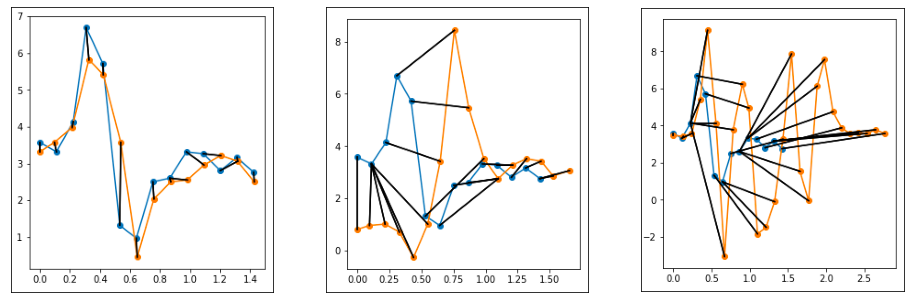

In [30]:
# Example image required for problem 2.2.1
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,3)
fig.set_size_inches(16, 8)
axs[0].imshow(plt.imread('images/task2.2.1.png'))
axs[1].imshow(plt.imread('images/task2.2.2.png'))
axs[2].imshow(plt.imread('images/task2.2.3.png'))
for ax in axs:
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
plt.show()

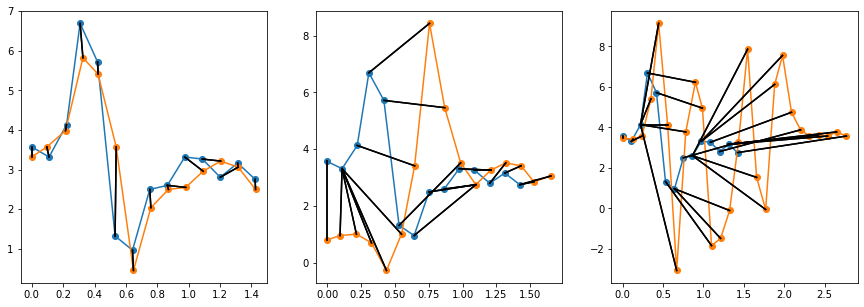

In [31]:
# Problem 2.2.1: Plot mapping
def mapplot(gesture1, gesture2, mapping1, mapping2):
    # Implement function which makes the required plots
    # YOUR CODE HERE
    
    #plot data
    plt.plot(gesture1[:,0], gesture1[:,1], '-o')
    plt.plot(gesture2[:,0], gesture2[:,1],'-o')
    
    
    for i, indices in enumerate(mapping1) :
        for j in indices:
            plt.plot([gesture1[:,0][i],gesture2[:,0][j]],[gesture1[:,1][i],gesture2[:,1][j]], 'k')
    for i, indices in enumerate(mapping2) :
        for j in indices:
            plt.plot([gesture1[:,0][j],gesture2[:,0][i]],[gesture1[:,1][j],gesture2[:,1][i]], 'k')
    

fig = plt.figure(figsize = (15,5))
fig.add_subplot(1,3,1) 
mapplot(reference_gesture.T, gesture1.T, mapping_1_1, mapping_1_2)
fig.add_subplot(1,3,2) 
mapplot(reference_gesture.T, gesture2.T, mapping_2_1, mapping_2_2)
fig.add_subplot(1,3,3) 
mapplot(reference_gesture.T, gesture3.T, mapping_3_1, mapping_3_2)


In [32]:
# Your points for Problem 2.2.1. will be given in this cell. Do not modify it.

#### Problem 2.2.2: Compare the results. What can be said about the mappings?
Answer in the cell below

First gesture is the most similar one to the reference gesture. Other 2 are not that similar

## 3. Semantic Alignment: Clustering

### Introduction

In this assignment, k-means clustering ensembles are used to segment color image. Different color spaces are formed and clustered independently in pixel level. The results are then fused using another k-means applied to joint feature presentation formed from the identity vectors of individual algorithms. For the background, take a look at third part of Lecture 4 (semantic alignment). Also, Chapter 7. in the course book is relevant.

### Image transforms to different color spaces

<a id='Task3.1'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 3.1. 

<p> 1) Complete the code below to transform input image to different color spaces of RGB, HSV, LAB, YUV, XYZ, LUV using the methods in <a href = "https://scikit-image.org"> scikit-image library </a> </p>
<p> 2) Min-Max normalize transformed images to [0, 1]
<p> 3) Plot all six images (original and normalized transformed images). Remember that you are no longer plotting RGB images! <i>Hint: Your output image should look like in the cell below</i></p>
</div>

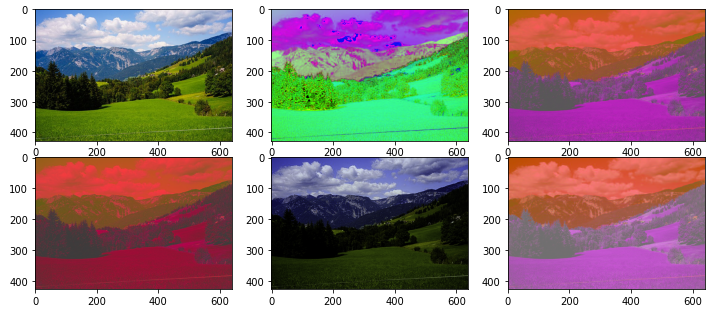

In [33]:
# Example image required for problem 3.1.3
from IPython.display import Image
Image(filename='images/task3.1.png')

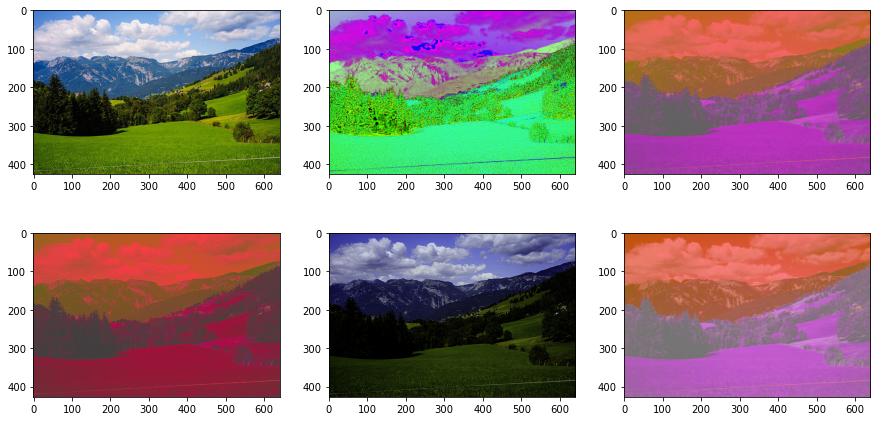

In [34]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
# Import relevant functions from skimage
# YOUR CODE HERE
from skimage.color import rgb2hsv
from skimage.color import rgb2lab
from skimage.color import rgb2yuv
from skimage.color import rgb2xyz
from skimage.color import rgb2luv

# load image 'landscape.jpg' as pixel array
f1_img = img.imread('images/landscape.jpg')

# Problem 3.1.1.
# 1) convert image 'f1_img' int different color maps from rgb
f2_img = rgb2hsv(f1_img) # into HSV
f3_img = rgb2lab(f1_img) # into LAB
f4_img = rgb2yuv(f1_img) # into YUV
f5_img = rgb2xyz(f1_img) # into XYZ
f6_img = rgb2luv(f1_img) # into LUV

# Problem 3.1.2.
# 2) Min-Max normalize f2_img, ..., f6_img to [0, 1]
f2_img = (f2_img-np.min(f2_img))/(np.max(f2_img)-np.min(f2_img))
f3_img = (f3_img-np.min(f3_img))/(np.max(f3_img)-np.min(f3_img))
f4_img = (f4_img-np.min(f4_img))/(np.max(f4_img)-np.min(f4_img))
f5_img = (f5_img-np.min(f5_img))/(np.max(f5_img)-np.min(f5_img))
f6_img = (f6_img-np.min(f6_img))/(np.max(f6_img)-np.min(f6_img))

# Problem 3.1.3.
# display all arrays of pixels as images (original and normalized transformed images)
## Your code here
fig1= plt.figure(figsize=(15,15))
fig1.add_subplot(1,3,1)
plt.imshow(f1_img)
fig1.add_subplot(1,3,2)
plt.imshow(f2_img)
fig1.add_subplot(1,3,3)
plt.imshow(f3_img)
fig1.add_subplot(2,3,4)
plt.imshow(f4_img)
fig1.add_subplot(2,3,5)
plt.imshow(f5_img)
fig1.add_subplot(2,3,6)
plt.imshow(f6_img)

In [35]:
# Your points for Problem 3.1 will be given in this cell. Do not modify it.

##  Image segmentation by different color spaces

<a id='Task3.2'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 3.2. 

<p>Complete the code below to apply k-means clustering separately to different color spaces (for all images calculated above i.e., original and all normalized transformed images). Hint: use function "kmeans_clustering" represented in tutorial section above. Use 4 cluster and pixel level features (e.g., in RGB each pixel is presented as 3-dimensional vector, and there should be 273280 vectors). Plot the segmented images. </p>

<p><i>Hint: Your output image should look something like in the cell below</i><p>
</div>

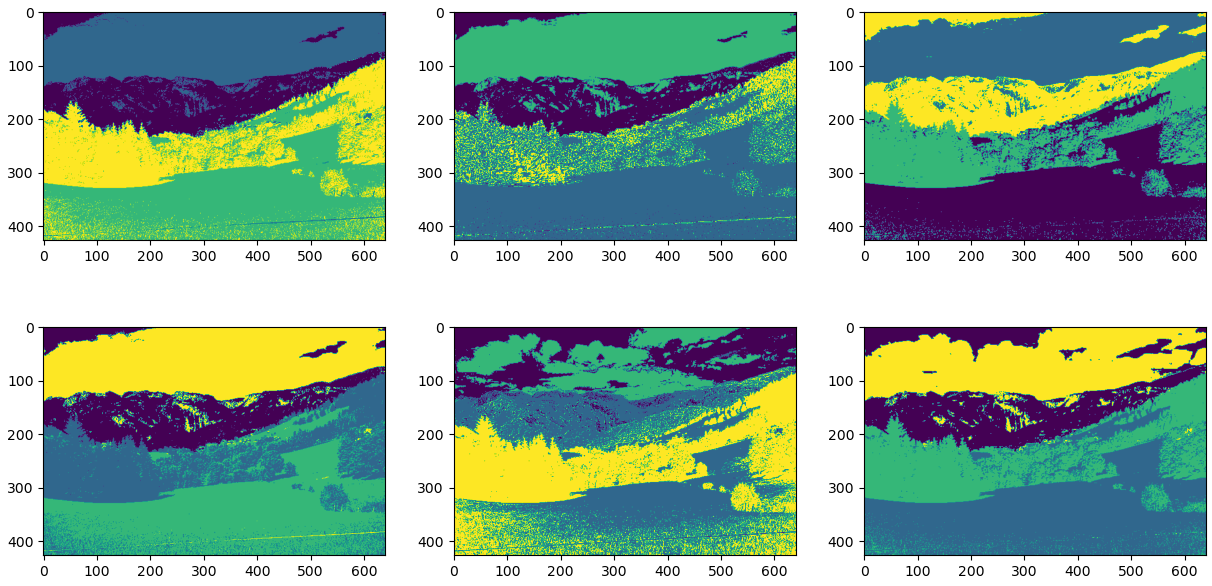

In [36]:
# Example image required for problem 3.2
from IPython.display import Image
Image(filename='images/task3.2.png')

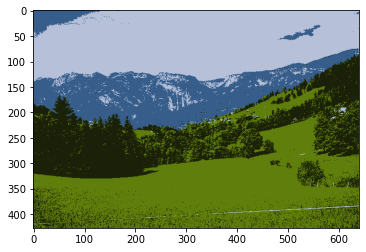

In [37]:
np.random.seed(0) # Do not change or remove

# Make feature vectors from the pixels 
# YOUR CODE HERE
#raise NotImplementedError()
#print(len(f1_img[0]))
def getPixelVectors(img):
    return img.reshape((-1,3))

k = 4 # number of clusters to form

# Perform k-means clustering on all six images seperately and compute resulting images

# Do the clustering for first image here
## Your code here
X1= getPixelVectors(f1_img)
#print(X1.shape)
#print(X1[0])
cluster_means1, cluster_indices1 = kmeans_clustering(X1, k = k)
center1 = np.uint8(cluster_means1)
result1 = center1[cluster_indices1.flatten()] 

# Create the segmented array from labels and values
res_img1 = np.reshape(result1,f1_img.shape)

plt.imshow(res_img1)

In [38]:
# Your points for first clustering will be given in this cell. Do not modify it.

In [39]:
np.random.seed(0) # Do not change or remove

# Do the clustering for second image here
# YOUR CODE HERE
#raise NotImplementedError()
X2 = getPixelVectors(f2_img) 
#print(len(X2[0]))
cluster_means2, cluster_indices2 = kmeans_clustering(X2, k = k)
#center1=np.uint8(cluster_means1)
result2 = cluster_means2[cluster_indices2] 
# res_img2 = np.reshape(result2,f2_img.shape)
# plt.imshow(res_img2)

In [40]:
# Your points for second clustering will be given in this cell. Do not modify it.

In [41]:
np.random.seed(0) # Do not change or remove

# Do the clustering for third image here
# YOUR CODE HERE
#raise NotImplementedError()
X3 = getPixelVectors(f3_img)
cluster_means3, cluster_indices3 = kmeans_clustering(X3,k = k)
result3 = cluster_means3[cluster_indices3] 
# res_img3 = np.reshape(result3,f3_img.shape)
# plt.imshow(res_img3)

In [42]:
# Your points for third clustering will be given in this cell. Do not modify it.

In [43]:
np.random.seed(0) # Do not change or remove

# Do the clustering for fourth image here
# YOUR CODE HERE
#raise NotImplementedError()
X4 = getPixelVectors(f4_img)
cluster_means4, cluster_indices4 = kmeans_clustering(X4, k = k)
result4 = cluster_means3[cluster_indices4] 
# res_img4 = np.reshape(result4,f4_img.shape)
# res_img4 = np.reshape(result3,f3_img.shape)
# plt.imshow(res_img4)

In [44]:
# Your points for fourth clustering will be given in this cell. Do not modify it.

In [45]:
np.random.seed(0) # Do not change or remove

# Do the clustering for fith image here
# YOUR CODE HERE
#raise NotImplementedError()
X5 = getPixelVectors(f5_img)
cluster_means5, cluster_indices5 = kmeans_clustering(X5, k = k)
result5 = cluster_means5[cluster_indices5] 
#res_img5 = "Your answer here"


In [46]:
# Your points for fifth clustering will be given in this cell. Do not modify it.

In [47]:
np.random.seed(0) # Do not change or remove

# Do the clustering for sixth image here
# YOUR CODE HERE
#raise NotImplementedError()
X6 = getPixelVectors(f6_img)
cluster_means6, cluster_indices6 = kmeans_clustering(X6, k = k)
result6 = cluster_means6[cluster_indices6] 
#res_img6 = "Your answer here"
#print(len(cluster_indices6))

In [48]:
# Your points for sixth clustering will be given in this cell. Do not modify it.

In [49]:
# Plot all k-means clustering resulting images
# YOUR CODE HERE
#raise NotImplementedError()
# #fig2= plt.figure(figsize=(15,15))
# fig, axs = plt.subplots(2, 3, figsize=(15,6))
# #fig2.add_subplot(1,3,1)
# axs[0,0].scatter(X1[:, 0], X1[:, 1], marker='o', c=cluster_indices1,
#             s=25, edgecolor='k')
# axs[0,0].scatter(cluster_means1[:,0], cluster_means1[:,1], marker='x', s=100, color = 'r')

# axs[0,1].scatter(X2[:, 0], X2[:, 1], marker='o', c=cluster_indices2,
#             s=25, edgecolor='k')
# axs[0,1].scatter(cluster_means2[:,0], cluster_means2[:,1], marker='x', s=100, color = 'r')

# axs[0,2].scatter(X3[:, 0], X3[:, 1], marker='o', c=cluster_indices3,
#             s=25, edgecolor='k')
# axs[0,2].scatter(cluster_means3[:,0], cluster_means3[:,1], marker='x', s=100, color = 'r')

# axs[1,0].scatter(X4[:, 0], X4[:, 1], marker='o', c=cluster_indices4,
#             s=25, edgecolor='k')
# axs[1,0].scatter(cluster_means4[:,0], cluster_means4[:,1], marker='x', s=100, color = 'r')

# axs[1,1].scatter(X5[:, 0], X5[:, 1], marker='o', c=cluster_indices5,
#             s=25, edgecolor='k')
# axs[1,1].scatter(cluster_means5[:,0], cluster_means5[:,1], marker='x', s=100, color = 'r')

# axs[1,2].scatter(X6[:, 0], X6[:, 1], marker='o', c=cluster_indices6,
#             s=25, edgecolor='k')
# axs[1,2].scatter(cluster_means6[:,0], cluster_means6[:,1], marker='x', s=100, color = 'r')


In [50]:
# Your points for the plot will be given in this cell. Do not modify it.

###  Image segmentation by fusion of color spaces

<a id='Task3.3'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 3.3. 

<p>Complete the code below to apply k-means clustering to fuse the results of different color spaces from previous tasks. Concatenate the clustering results from each k-means model to joint feature vector. Normalize features between 0 and 1. Plot the original image and fused segmented image.</p>
<p><i>Hint: Your output image should look something like in the cell below</i></p>

</div>

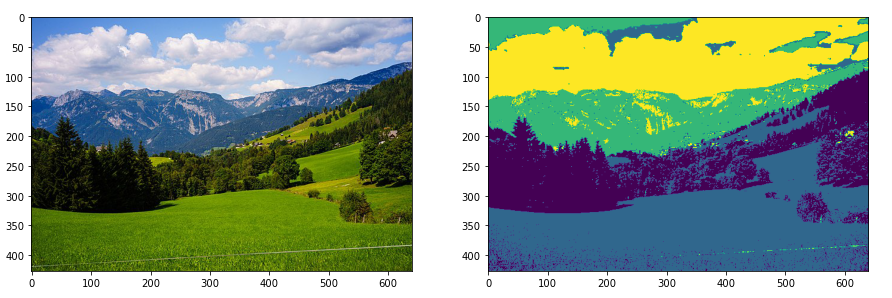

In [51]:
# Example image required for problem 3.3
from IPython.display import Image
Image(filename='images/task3.3.png')

In [52]:
# concatenate cluster features to joint feature presentation (Output size should be (273280, 6) with 6 dimensions corresponding to 6 colour spaces)
# YOUR CODE HERE
#raise NotImplementedError()
#X = "Your answer here" # joint feature presentation

# normalize 0 to 1 (0-3 clusters)
## Your code here


# Perform k-means clustering on fused image and compute resulting image
np.random.seed(0) # Do not change or remove
## Your code here
# cluster_means, cluster_indices = "Your answer here"
# res_img = "Your answer here"

# Plot original and k-means clustering resulting image
## Your code here

In [53]:
# Your points for Problem 3.3 joint feature implementation will be given in this cell. Do not modify it.

In [54]:
# Your points for Problem 3.3 clustering and plot implementation will be given in this cell. Do not modify it.

## 4. Radiometric Normalization

### Introduction

In this assigment, different radiometric scaling approaches are studied using [heart disease dataset](https://archive.ics.uci.edu/ml/datasets/heart+disease). For the background, take a look at fourth part of Lecture 4 (radiometric normalization). Also, Chapter 8. in course book is relevant.

### Dataset

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/heart-disease.csv')
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


### Scales of measurements

<a id='Task4.1'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 4.1. 

<p>Run the code below and answer the questions below.</p>

<p>1) What are the different scales of measurement types?</p>
<p>2) What are the scales of variables below?</p>

Variables are introduced in https://archive.ics.uci.edu/ml/datasets/heart+disease
</div>

In [56]:
data[['age','sex','trestbps','chol']].head(10)

# Problem 4.1.1.
scales = ['nominal', 'ordinal', 'interval', 'ratio'] # Give the names of the scales as a list. Give each scale name as a string

# Problem 4.1.2.
# Give scale name as a string 
age = 'interval' # scale name 
sex = 'nominal' # scale name
trestbps = 'interval' # scale name
chol = 'interval' # scale name

In [57]:
# Your points for Problem 4.1.1 will be given in this cell. Do not modify it.

In [58]:
# Your points for Problem 4.1.2 age scale will be given in this cell. Do not modify it.

In [59]:
# Your points for Problem 4.1.2 sex scale will be given in this cell. Do not modify it.

In [60]:
# Your points for Problem 4.1.2 trestbps scale will be given in this cell. Do not modify it.

In [61]:
# Your points for Problem 4.1.2 chol scale will be given in this cell. Do not modify it.

### Degree-of-similarity scales

In [62]:
# Lets use only subset of data in rest of the problems
subdata = data[['age','trestbps', 'chol']].head(5)
subdata

,age,trestbps,chol
0,63.0,145.0,233.0
1,67.0,160.0,286.0
2,67.0,120.0,229.0
3,37.0,130.0,250.0
4,41.0,130.0,204.0


#### Euclidean distance

<a id='Task4.2'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 4.2. 

<p>Complete the code below to calculate euclidean distance based similarity matrix for 'subdata'.</p> 
<p>Euclidean distance for vectors a and b with dimension M is defined as:</p>
\begin{equation*}
d(a, b)=\sqrt{\sum_{m=1}^M(a_m - b_m)^2}
\end{equation*}
</div>

In [63]:
def euclidean_distance(a, b):
    # YOUR CODE HERE
    #raise NotImplementedError()
    #distance_matrix = np.sqrt(np.sum(np.dot((a-b).T,(a-b))))
    distance_matrix = np.sqrt(np.sum(np.square(a-b)))
    return distance_matrix

d = subdata.to_numpy()
distance_matrix = np.zeros((5, 5))
for i in range(distance_matrix.shape[0]):
    for j in range(distance_matrix.shape[1]):
        distance_matrix[i,j] = euclidean_distance(d[i,:], d[j,:])
print('Euclidean distances: \n', distance_matrix)

Euclidean distances: 
 [[ 0.         55.22680509 25.63201124 34.49637662 39.37003937]
 [55.22680509  0.         69.63476143 55.64171097 91.10433579]
 [25.63201124 69.63476143  0.         37.96050579 37.42993454]
 [34.49637662 55.64171097 37.96050579  0.         46.17358552]
 [39.37003937 91.10433579 37.42993454 46.17358552  0.        ]]


In [64]:
# Your points for Problem 4.2 will be given in this cell. Do not modify it.

#### City-block distance distance

<a id='Task4.3'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 4.3. 

<p>Complete the code below to calculate city-block distance based similarity matrix for 'subdata'.</p>
<p>City-block distance for vectors a and b with dimension M is defined as:</p>
\begin{equation*}
d(a, b)=\sum_{m=1}^M |a_m - b_m|
\end{equation*}

</div>

In [65]:
def city_block_distance(a, b):
    # YOUR CODE HERE
    #raise NotImplementedError()
    distance_matrix = np.sum(np.abs(a-b))
    return distance_matrix

d = subdata.to_numpy()
distance_matrix = np.zeros((5, 5))
for i in range(distance_matrix.shape[0]):
    for j in range(distance_matrix.shape[1]):
        distance_matrix[i,j] = city_block_distance(d[i,:], d[j,:])
print('City-block distances: \n', distance_matrix)

City-block distances: 
 [[  0.  72.  33.  58.  66.]
 [ 72.   0.  97.  96. 138.]
 [ 33.  97.   0.  61.  61.]
 [ 58.  96.  61.   0.  50.]
 [ 66. 138.  61.  50.   0.]]


In [66]:
# Your points for Problem 4.3 will be given in this cell. Do not modify it.

#### Chebyshev distance

<a id='Task4.4'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 4.4. 

<p>Complete the code below to calculate Chebyshev distance based similarity matrix.</p>
<p>Chebyshev distance for vectors a and b with dimension M is defined as:</p>
\begin{equation*}
d(a, b)= max_m (|a_m - b_m|)
\end{equation*}
    
</div>

In [67]:
def chebyshev_distance(a, b):
    # YOUR CODE HERE
    #raise NotImplementedError()
    distance_matrix = max(np.abs(a-b))
    return distance_matrix

d = subdata.to_numpy()
distance_matrix = np.zeros((5, 5))
for i in range(distance_matrix.shape[0]):
    for j in range(distance_matrix.shape[1]):
        distance_matrix[i,j] = chebyshev_distance(d[i,:], d[j,:])       
print('Chebyshev distances: \n', distance_matrix)

Chebyshev distances: 
 [[ 0. 53. 25. 26. 29.]
 [53.  0. 57. 36. 82.]
 [25. 57.  0. 30. 26.]
 [26. 36. 30.  0. 46.]
 [29. 82. 26. 46.  0.]]


In [68]:
# Your points for Problem 4.4 will be given in this cell. Do not modify it.

### Parametric normalization

#### Z-transform scaling

<a id='Task4.5'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 4.5. 

<p>Complete the code below to calculate Z-transfrom scaling from given data, i.e., zero mean unit standard deviation scaling.</p>
<p>Z-transform:</p>
\begin{equation*}
    y = \frac{x - \mu}{\sigma},
\end{equation*}
where $\mu$ is the sample mean, and $\sigma$ is the standard deviation.
</div>

In [69]:
subdata = data[['age','trestbps', 'chol']]

def z_transform(data):
    # YOUR CODE HERE
    #raise NotImplementedError()
    age = data['age']
    mean_age = np.mean(age)
    std_age = np.std(age)
    z_age = (age-mean_age)/std_age
    
    
    trestbps = data['trestbps']
    mean_trestbps = np.mean(trestbps)
    std_trestbps = np.std(trestbps)
    z_trestbps = (trestbps-mean_trestbps)/std_trestbps
    
    chol = data['chol']
    mean_chol = np.mean(chol)
    std_chol = np.std(chol)
    z_chol = (chol-mean_chol)/std_chol
    
    scaled_data = pd.DataFrame({'age': z_age, 'trestbps': z_trestbps, 'chol': z_chol})
#     print(data)
#     print(scaled_data)
    return scaled_data # Function should return pandas DataFrame
    
scaled_data = z_transform(subdata) 
answer = scaled_data.head(10)

In [70]:
# Your points for Problem 4.5 will be given in this cell. Do not modify it.

#### Min-Max scaling

<a id='Task4.6'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 4.6. 

<p>Complete the code below to calculate min-max scaling for given data.</p>
<p>min-max:</p>
\begin{equation*}
y = \frac{x -\min (x)}{\max (x)-\min (x)}
\end{equation*}
</div>

In [71]:
subdata = data[['age','trestbps', 'chol']]

def min_max(data):
    # YOUR CODE HERE
    #raise NotImplementedError()
    age = data['age']
    min_age = min(age)
    max_age = max(age)
    y_age = (age-min_age)/(min_age-max_age)
    
    trestbps = data['trestbps']
    min_trestbps = min(trestbps)
    max_trestbps = max(trestbps)
    y_trestbps = (age-min_trestbps)/(min_trestbps-max_trestbps)
    
    chol = data['chol']
    min_chol = min(chol)
    max_chol = max(chol)
    y_chol = (chol-min_chol)/(min_chol-max_chol)
    
    scaled_data = pd.DataFrame({'age': y_age, 'trestbps': y_trestbps, 'chol': y_chol})
#     print(data)
#     print(scaled_data)
    return scaled_data # Function should return pandas DataFrame


scaled_data = min_max(subdata)
answer = scaled_data.head(10)

In [72]:
# Your points for Problem 4.6 will be given in this cell. Do not modify it.